In [1]:
# Imports
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd


# Part 1: Datos

In [10]:
# Load data
iris = load_iris()
X = iris.data
Y = iris.target

print("Data shape:", X.shape)
print("Examples:\n", X[:10])
print("\nLabels shape", Y.shape)
print("Examples:\n", Y)
print("Class names:", iris.target_names)

Data shape: (150, 4)
Examples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Labels shape (150,)
Examples:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class names: ['setosa' 'versicolor' 'virginica']


In [11]:
# Print more info
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

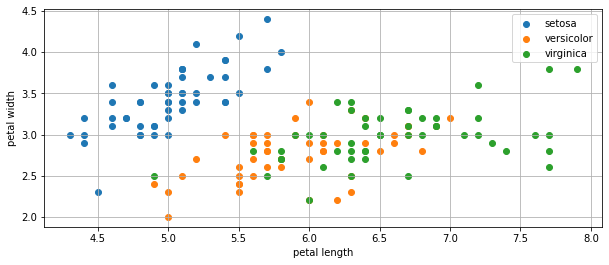

In [12]:
# Plot two features: petal length and petal width
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

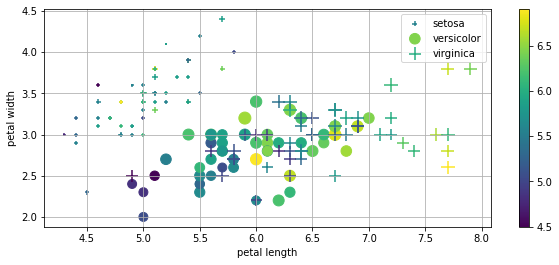

In [14]:
# == Q1: ==
# Idea alguna manera de visualizar y diferenciar las 4 variables al mismo tiempo,
# usando una sola gráfica 2D. Muestra tu solución:

# Plot four features
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0], s=80*X[Y==0, 3], c=[ b for b in X[Y==0, 2]], marker='+')
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1], s=80*X[Y==1, 3], c=[ b for b in X[Y==1, 2]], marker='o')
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2], s=80*X[Y==2, 3], c=[ b for b in X[Y==2, 2]], marker='+')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.colorbar()
plt.show()




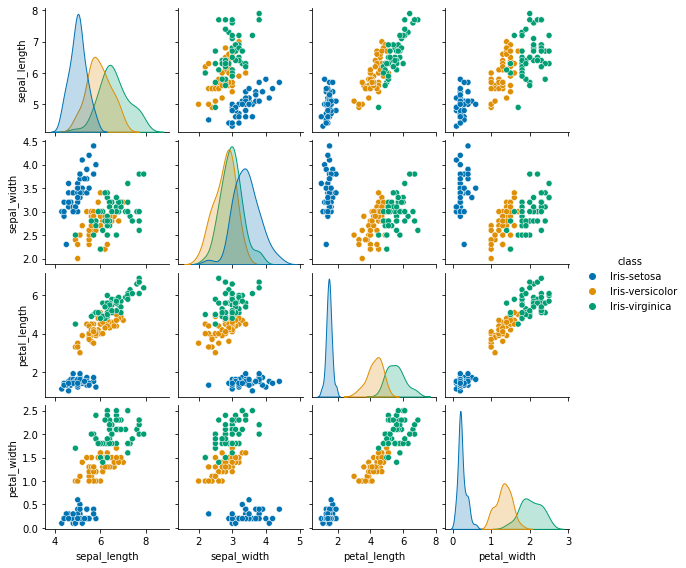

In [13]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataset = pd.read_csv(url, names = attributes)
dataset.columns = attributes
fig = sns.pairplot(dataset, hue="class", height = 2, palette = 'colorblind');
fig.savefig("out.png") 


In [12]:
# Let's keep two classes only, and two variables
X = X[:100, :2]
Y = Y[:100]

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)

Data: (100, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Labels (100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
# Split data into training + validation and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


# Part 2: Perceptron

In [40]:
# Define class linear (step) perceptron
class LPerceptron:
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
  
  #activation function  
  def activation(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      result = self.activation(x)
      Y.append(result)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=1, val_split=0.1, verbose=False):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split) #split train into train and val
    
    self.w = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train))
    accuracy[1] = accuracy_score(y_val, self.predict(x_val))
    if verbose:
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        y_hat = self.activation(x)
        err = y - y_hat
        self.w = self.w + lr * err * x  #LA
        self.b = self.b + lr * err      #LB
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train))
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val))
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

In [41]:
# == Q2: ==
# Explica qué sucede en las líneas comentadas como #LA y #LB.
# ¿Qué significa cada térmido de las ecuaciones?
# ¿Por qué las expresiones contienen el término "err"?
# ¿Por qué la expresión en #LA contiene la variable de entrada "x"?
# ¿Cuántas iteraciones suceden en el loop interno del método fit?

En esas líneas pasa el descenso de gradiente. $lr$ es el "learning rate", $err$ es el error y en este caso como estamos usando un perceptrón lineal ese error por w es igual a $\frac{\delta E}{\delta w}$. LB simplemente es la actualización del intercepto, por eso tiene 1. Se itera el número de épocas por el tamaño de la muestra.

In [42]:
# Create a model and train it for 50 epochs
perceptron = LPerceptron()
acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.5, val_split=0.1, verbose=True)
# Encuentra el mejor learning rate lr

Epoch:   0 -- acc: 0.4861, acc_val: 0.3750
Epoch:   1 -- acc: 0.4861, acc_val: 0.3750
Epoch:   2 -- acc: 0.9861, acc_val: 1.0000
Epoch:   3 -- acc: 0.4861, acc_val: 0.3750
Epoch:   4 -- acc: 0.9722, acc_val: 0.8750
Epoch:   5 -- acc: 0.7917, acc_val: 0.8750
Epoch:   6 -- acc: 0.9861, acc_val: 1.0000
Epoch:   7 -- acc: 0.9722, acc_val: 0.8750
Epoch:   8 -- acc: 0.6250, acc_val: 0.5000
Epoch:   9 -- acc: 0.9861, acc_val: 1.0000
Epoch:  10 -- acc: 0.9722, acc_val: 1.0000
Epoch:  11 -- acc: 0.9028, acc_val: 0.6250
Epoch:  12 -- acc: 0.9722, acc_val: 1.0000
Epoch:  13 -- acc: 0.9861, acc_val: 1.0000
Epoch:  14 -- acc: 0.9861, acc_val: 1.0000
Epoch:  15 -- acc: 0.9722, acc_val: 0.8750
Epoch:  16 -- acc: 0.8750, acc_val: 1.0000
Epoch:  17 -- acc: 0.9722, acc_val: 1.0000
Epoch:  18 -- acc: 0.9861, acc_val: 1.0000
Epoch:  19 -- acc: 0.9861, acc_val: 1.0000
Epoch:  20 -- acc: 0.9722, acc_val: 0.8750
Epoch:  21 -- acc: 0.8889, acc_val: 1.0000
Epoch:  22 -- acc: 0.9722, acc_val: 1.0000
Epoch:  23 

In [43]:
# Making predictions on test data
y_test_hat = perceptron.predict(x_test)
print("Test acc:", accuracy_score(y_test_hat, y_test))

Test acc: 1.0


In [ ]:
# Show the final values for the weights and bias
print("Weights:", perceptron.w)
print("bias:", perceptron.b)

Weights: [ 15.36071332 -28.47541912]
bias: -7.0


In [54]:
# == Q3: ==
# Corre el experimento anterior 100 veces (quizás quieras establecer verbose=False),
# y reporta el promedio +- desviación estándar obtenidos en la última época de cada corrida.
# Debes reportar 3 promedios: para training, validation, y test sets
# ¿Notas algún cambio significativo?
ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.5, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
  print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
  print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
  print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.0099 +- 0.0981
Validation:	 0.0100 +- 0.0995
Test:		 0.0100 +- 0.0995
Training:	 0.0189 +- 0.1324
Validation:	 0.0187 +- 0.1315
Test:		 0.0195 +- 0.1365
Training:	 0.0285 +- 0.1620
Validation:	 0.0288 +- 0.1638
Test:		 0.0290 +- 0.1650
Training:	 0.0383 +- 0.1879
Validation:	 0.0387 +- 0.1901
Test:		 0.0390 +- 0.1911
Training:	 0.0482 +- 0.2102
Validation:	 0.0488 +- 0.2128
Test:		 0.0490 +- 0.2137
Training:	 0.0579 +- 0.2294
Validation:	 0.0587 +- 0.2328
Test:		 0.0590 +- 0.2336
Training:	 0.0672 +- 0.2452
Validation:	 0.0675 +- 0.2465
Test:		 0.0685 +- 0.2498
Training:	 0.0769 +- 0.2611
Validation:	 0.0775 +- 0.2633
Test:		 0.0785 +- 0.2663
Training:	 0.0856 +- 0.2723
Validation:	 0.0875 +- 0.2787
Test:		 0.0875 +- 0.2784
Training:	 0.0954 +- 0.2865
Validation:	 0.0975 +- 0.2929
Test:		 0.0975 +- 0.2927
Training:	 0.1054 +- 0.3002
Validation:	 0.1062 +- 0.3028
Test:		 0.1075 +- 0.3060
Training:	 0.1151 +- 0.3121
Validation:	 0.1163 +- 0.3154
Test:		 0.1175 +- 0.3184
Trai

Encuentro que tiende a 1 la media y la sd tiende a 0. Mejora mucho más en el test set.

In [64]:
# == Q4: ==
# Repite el experimento anterior pero ahora usando las 4 variables de los datos (en vez de sólo 2)
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?

X = X[:100]
Y = Y[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.5, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
  print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
  print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
  print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.0088 +- 0.0872
Validation:	 0.0078 +- 0.0774
Test:		 0.0090 +- 0.0895
Training:	 0.0185 +- 0.1298
Validation:	 0.0178 +- 0.1254
Test:		 0.0190 +- 0.1332
Training:	 0.0283 +- 0.1610
Validation:	 0.0278 +- 0.1590
Test:		 0.0290 +- 0.1651
Training:	 0.0381 +- 0.1871
Validation:	 0.0378 +- 0.1861
Test:		 0.0390 +- 0.1913
Training:	 0.0467 +- 0.2038
Validation:	 0.0467 +- 0.2044
Test:		 0.0480 +- 0.2095
Training:	 0.0559 +- 0.2217
Validation:	 0.0567 +- 0.2253
Test:		 0.0570 +- 0.2259
Training:	 0.0648 +- 0.2366
Validation:	 0.0667 +- 0.2439
Test:		 0.0670 +- 0.2446
Training:	 0.0747 +- 0.2537
Validation:	 0.0767 +- 0.2609
Test:		 0.0770 +- 0.2615
Training:	 0.0844 +- 0.2689
Validation:	 0.0867 +- 0.2765
Test:		 0.0870 +- 0.2770
Training:	 0.0940 +- 0.2823
Validation:	 0.0956 +- 0.2876
Test:		 0.0970 +- 0.2914
Training:	 0.1040 +- 0.2961
Validation:	 0.1044 +- 0.2981
Test:		 0.1070 +- 0.3047
Training:	 0.1138 +- 0.3087
Validation:	 0.1144 +- 0.3109
Test:		 0.1170 +- 0.3172
Trai

Empezamos con mucha menor acc y mucha varianza, y al final el desempeño en los 3 sets es similar. Tiene sentido ya que al incluir más vairables estamos exigiéndole más al modelo.

In [68]:
# == Q5: ==
# Repite el experimento anterior pero ahora usando las 4 variables de las clases
# versicolor (1) y virginica (2).
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?
# ¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: Y = iris.target[:100]?

X = X[Y!=2]
Y = Y[Y!=2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.5, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
  print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
  print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
  print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.0096 +- 0.0958
Validation:	 0.0100 +- 0.0995
Test:		 0.0100 +- 0.0995
Training:	 0.0195 +- 0.1366
Validation:	 0.0200 +- 0.1400
Test:		 0.0190 +- 0.1332
Training:	 0.0294 +- 0.1671
Validation:	 0.0300 +- 0.1706
Test:		 0.0290 +- 0.1651
Training:	 0.0393 +- 0.1923
Validation:	 0.0400 +- 0.1960
Test:		 0.0390 +- 0.1913
Training:	 0.0490 +- 0.2137
Validation:	 0.0500 +- 0.2179
Test:		 0.0480 +- 0.2095
Training:	 0.0589 +- 0.2331
Validation:	 0.0600 +- 0.2375
Test:		 0.0570 +- 0.2259
Training:	 0.0662 +- 0.2423
Validation:	 0.0678 +- 0.2479
Test:		 0.0640 +- 0.2347
Training:	 0.0754 +- 0.2569
Validation:	 0.0778 +- 0.2646
Test:		 0.0730 +- 0.2489
Training:	 0.0851 +- 0.2715
Validation:	 0.0878 +- 0.2799
Test:		 0.0820 +- 0.2621
Training:	 0.0949 +- 0.2858
Validation:	 0.0978 +- 0.2941
Test:		 0.0910 +- 0.2743
Training:	 0.1047 +- 0.2988
Validation:	 0.1067 +- 0.3043
Test:		 0.1000 +- 0.2857
Training:	 0.1133 +- 0.3080
Validation:	 0.1167 +- 0.3168
Test:		 0.1070 +- 0.2916
Trai

# Part 3: Non-linear (sigmoid) Perceptron

In [ ]:
# Completa el siguiente código del perceptron no lineal (sigmoide)

In [72]:
# Define class perceptron
class Perceptron:
  #constructor
  def __init__ (self):
    self.W = None
    self.b = None
  
  #total neuron input
  def lin_sum(self, X):
    return np.dot(self.W, X) + self.b
  
  #activation (sigmoid)
  def sigmoid(self, s):
    return 1.0 / (1.0 + np.exp(-s))
  
  #derivative of activation (sigmoid)
  def d_sigmoid(self, s):
    return self.sigmoid(s) * (1.0 - self.sigmoid(s))
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      s = self.lin_sum(x)
      y = self.sigmoid(s)
      Y.append(y)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=0.1, val_split=0.1, verbose=False):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
    
    self.W = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train).round())
    accuracy[1] = accuracy_score(y_val, self.predict(x_val).round())
    if verbose:
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        # Forward pass
        s = self.lin_sum(x)
        y_hat = self.sigmoid(s)
        # Backward pass
        err = y - y_hat
        self.W = self.W+lr*err*self.d_sigmoid(s)*x
        self.b = self.b+lr*err*self.d_sigmoid(s)
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train).round())
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val).round())
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

In [73]:
# == Q6: ==
# Repite el experimento anterior usando las 4 variables de las clases 
# versicolor (1) y virginica (2), pero ahora usando el Perceptron logístico.
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?

X = X[Y!=2]
Y = Y[Y!=2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = Perceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.5, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test, y_test_hat.round())
  print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
  print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
  print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.0100 +- 0.0995
Validation:	 0.0100 +- 0.0995
Test:		 0.0090 +- 0.0895
Training:	 0.0200 +- 0.1400
Validation:	 0.0200 +- 0.1400
Test:		 0.0180 +- 0.1260
Training:	 0.0300 +- 0.1706
Validation:	 0.0300 +- 0.1706
Test:		 0.0270 +- 0.1535
Training:	 0.0400 +- 0.1960
Validation:	 0.0400 +- 0.1960
Test:		 0.0360 +- 0.1764
Training:	 0.0499 +- 0.2174
Validation:	 0.0500 +- 0.2179
Test:		 0.0450 +- 0.1962
Training:	 0.0599 +- 0.2370
Validation:	 0.0600 +- 0.2375
Test:		 0.0540 +- 0.2137
Training:	 0.0699 +- 0.2547
Validation:	 0.0700 +- 0.2551
Test:		 0.0630 +- 0.2296
Training:	 0.0799 +- 0.2709
Validation:	 0.0800 +- 0.2713
Test:		 0.0720 +- 0.2442
Training:	 0.0899 +- 0.2858
Validation:	 0.0900 +- 0.2862
Test:		 0.0810 +- 0.2576
Training:	 0.0999 +- 0.2996
Validation:	 0.1000 +- 0.3000
Test:		 0.0900 +- 0.2700
Training:	 0.1098 +- 0.3122
Validation:	 0.1100 +- 0.3129
Test:		 0.0990 +- 0.2816
Training:	 0.1198 +- 0.3243
Validation:	 0.1200 +- 0.3250
Test:		 0.1080 +- 0.2925
Trai

Hay mucho mejor desempeño en training y validation, pero un pobre desempeño en test. Estamos en un caso de overfitting. Puede ser que para una de los iris el mejor modelo era uno lineal.

# Part 4: Sklearn Perceptron

In [ ]:
# Manually divide train, val, y test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
# Use perceptron from scikit-learn
from sklearn.linear_model import Perceptron
sk_perceptron = Perceptron(max_iter=50, eta0=0.3)
sk_perceptron.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.3,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Print performance
print(f"Training:\t {sk_perceptron.score(x_train, y_train):.4f}")
print(f"Validation:\t {sk_perceptron.score(x_val, y_val):.4f}")
print(f"Test:\t\t {sk_perceptron.score(x_test, y_test):.4f}")

Training:	 0.9444
Validation:	 0.8750
Test:		 0.9500
